In [1]:
import numpy as np

discreteness = 20
learning_rate = 0.2
iterations = 10000
action_randomness = 0.5
action_randomness_decay_rate = (1 - action_randomness) / iterations
discount_factor = 0.99
render_period = 1000
env_name = 'MountainCar-v0'

In [2]:
def make_discrete(env, observation):
    discrete = []
    for low, high, value in zip(env.observation_space.low, env.observation_space.high, observation):
        discrete.append(int((value - low) / (high - low) * discreteness))
    return discrete

In [3]:
import random

q_table = None
def create_q_table(env):
    global q_table
    # env.action_space.shape
    # np.append(env.observation_space.shape, env.action_space.n)
    q_table_shape = [discreteness for i in range(env.observation_space.shape[0])]
    q_table_shape.append(env.action_space.n)
    q_table = np.zeros(q_table_shape)

def get_action(env, state):
    global action_randomness
    
    action_randomness -= action_randomness_decay_rate
    action = 0
    if random.random() > action_randomness:
        state_discrete = make_discrete(env, state)
        action = q_table[tuple(state_discrete)].argmax()
    else:
        action = random.randint(0, env.action_space.n - 1)
    return action
    
def get_action2(env, state):
    position = state[0]
    velocity = state[1]
    
    if min(-0.09*(position + 0.25)**2 + 0.03, 0.3*(position + 0.9)**4 - 0.008 <= velocity <= -0.07*(position + 0.38)**2 + 0.07):
        action = 2
    else:
        action = 0
    return action
    
def update_q_table(env, state_old, action, state_new, reward):
    state_old_discrete = make_discrete(env, state_old)
    state_new_discrete = make_discrete(env, state_new)
    #print(state_old_discrete)
    q_table[tuple(state_old_discrete + [action])] = (1 - learning_rate) * q_table[tuple(state_old_discrete + [action])] \
                                + learning_rate * (reward + discount_factor * q_table[tuple(state_new_discrete)].max())

In [4]:
import gym
env = gym.make(env_name)
print(env.observation_space.low)
print(env.observation_space.high)

[-1.2  -0.07]
[0.6  0.07]


In [5]:
import gym
from tqdm import tqdm_notebook

env = gym.make(env_name)
create_q_table(env)
observation = env.reset()

record = env.spec.max_episode_steps - 1
history = []

for i in tqdm_notebook(range(iterations)):
    observation = env.reset()
    done = False
    reward_sum = 0
    for j in range(env.spec.max_episode_steps):
        if i % render_period == 0:
            env.render(mode='rgb_array')
        
        observation_old = observation
        action = get_action(env, observation)
        observation, reward, done, info = env.step(action)
        reward_sum += reward

        update_q_table(env, observation_old, action, observation, reward)
        
        if done == True:
            history.append(reward_sum)
            if j < record:
                print(f'New high score: {j} steps on {i} iteration')
                record = j
            break
            
env.close()

New high score: 197 steps on 326 iteration
New high score: 193 steps on 365 iteration
New high score: 169 steps on 366 iteration
New high score: 162 steps on 369 iteration
New high score: 157 steps on 730 iteration
New high score: 148 steps on 751 iteration
New high score: 130 steps on 780 iteration
New high score: 118 steps on 862 iteration
New high score: 116 steps on 2539 iteration
New high score: 114 steps on 2544 iteration
New high score: 112 steps on 2551 iteration
New high score: 100 steps on 3844 iteration



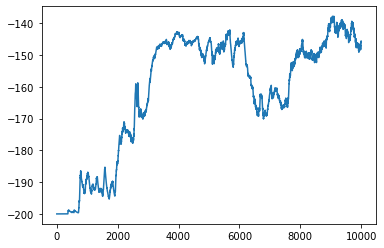

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Moving average
def smoothen_curve(points, factor=0.99):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(np.arange(len(history)), smoothen_curve(history))

In [7]:
import time

env = gym.make(env_name)
observation = env.reset()

for i in range(iterations):
    observation = env.reset()
    done = False
    for j in range(env.spec.max_episode_steps):
#         env.render()
        #time.sleep(0.1)
        
        action = get_action(env, observation)
        observation, reward, done, info = env.step(action)
        
        if done == True:
            if j < env.spec.max_episode_steps - 1:
                print(f'Win {j} steps on {i} iteration')
            break
env.close()

Win 150 steps on 0 iteration
Win 113 steps on 1 iteration
Win 191 steps on 2 iteration
Win 113 steps on 3 iteration
Win 113 steps on 4 iteration
Win 150 steps on 5 iteration
Win 148 steps on 6 iteration
Win 148 steps on 7 iteration
Win 111 steps on 8 iteration
Win 157 steps on 9 iteration
Win 113 steps on 10 iteration
Win 114 steps on 11 iteration
Win 149 steps on 12 iteration
Win 112 steps on 13 iteration
Win 193 steps on 14 iteration
Win 113 steps on 15 iteration
Win 149 steps on 16 iteration
Win 195 steps on 17 iteration
Win 114 steps on 18 iteration
Win 148 steps on 19 iteration
Win 149 steps on 20 iteration
Win 111 steps on 21 iteration
Win 149 steps on 22 iteration
Win 161 steps on 23 iteration
Win 113 steps on 24 iteration
Win 113 steps on 25 iteration
Win 149 steps on 26 iteration
Win 149 steps on 27 iteration
Win 111 steps on 28 iteration
Win 148 steps on 29 iteration
Win 149 steps on 30 iteration
Win 158 steps on 31 iteration
Win 113 steps on 32 iteration
Win 149 steps on 33 

Win 149 steps on 267 iteration
Win 150 steps on 268 iteration
Win 154 steps on 269 iteration
Win 149 steps on 270 iteration
Win 149 steps on 271 iteration
Win 148 steps on 272 iteration
Win 152 steps on 273 iteration
Win 148 steps on 274 iteration
Win 149 steps on 275 iteration
Win 112 steps on 276 iteration
Win 111 steps on 277 iteration
Win 192 steps on 278 iteration
Win 149 steps on 279 iteration
Win 112 steps on 280 iteration
Win 154 steps on 281 iteration
Win 156 steps on 282 iteration
Win 154 steps on 283 iteration
Win 113 steps on 284 iteration
Win 161 steps on 285 iteration
Win 148 steps on 286 iteration
Win 150 steps on 287 iteration
Win 112 steps on 288 iteration
Win 115 steps on 289 iteration
Win 116 steps on 290 iteration
Win 157 steps on 291 iteration
Win 157 steps on 292 iteration
Win 149 steps on 293 iteration
Win 149 steps on 294 iteration
Win 150 steps on 295 iteration
Win 148 steps on 296 iteration
Win 149 steps on 297 iteration
Win 195 steps on 298 iteration
Win 195 

Win 157 steps on 531 iteration
Win 193 steps on 532 iteration
Win 150 steps on 533 iteration
Win 192 steps on 534 iteration
Win 195 steps on 535 iteration
Win 112 steps on 536 iteration
Win 154 steps on 537 iteration
Win 196 steps on 538 iteration
Win 150 steps on 539 iteration
Win 112 steps on 540 iteration
Win 191 steps on 541 iteration
Win 149 steps on 542 iteration
Win 149 steps on 543 iteration
Win 149 steps on 544 iteration
Win 116 steps on 545 iteration
Win 112 steps on 546 iteration
Win 148 steps on 547 iteration
Win 111 steps on 548 iteration
Win 152 steps on 549 iteration
Win 149 steps on 550 iteration
Win 194 steps on 551 iteration
Win 194 steps on 552 iteration
Win 114 steps on 553 iteration
Win 196 steps on 554 iteration
Win 148 steps on 555 iteration
Win 161 steps on 556 iteration
Win 191 steps on 557 iteration
Win 148 steps on 558 iteration
Win 193 steps on 559 iteration
Win 154 steps on 560 iteration
Win 193 steps on 561 iteration
Win 150 steps on 562 iteration
Win 156 

Win 114 steps on 795 iteration
Win 157 steps on 796 iteration
Win 157 steps on 797 iteration
Win 148 steps on 798 iteration
Win 149 steps on 799 iteration
Win 150 steps on 800 iteration
Win 111 steps on 801 iteration
Win 111 steps on 802 iteration
Win 111 steps on 803 iteration
Win 111 steps on 804 iteration
Win 148 steps on 805 iteration
Win 111 steps on 806 iteration
Win 111 steps on 807 iteration
Win 149 steps on 808 iteration
Win 149 steps on 809 iteration
Win 149 steps on 810 iteration
Win 147 steps on 811 iteration
Win 161 steps on 812 iteration
Win 192 steps on 813 iteration
Win 194 steps on 814 iteration
Win 191 steps on 815 iteration
Win 150 steps on 816 iteration
Win 112 steps on 817 iteration
Win 113 steps on 818 iteration
Win 194 steps on 819 iteration
Win 148 steps on 820 iteration
Win 112 steps on 821 iteration
Win 148 steps on 822 iteration
Win 191 steps on 823 iteration
Win 113 steps on 824 iteration
Win 148 steps on 825 iteration
Win 148 steps on 826 iteration
Win 150 

Win 147 steps on 1057 iteration
Win 111 steps on 1058 iteration
Win 148 steps on 1059 iteration
Win 191 steps on 1060 iteration
Win 112 steps on 1061 iteration
Win 149 steps on 1062 iteration
Win 111 steps on 1063 iteration
Win 111 steps on 1064 iteration
Win 196 steps on 1065 iteration
Win 149 steps on 1066 iteration
Win 148 steps on 1067 iteration
Win 149 steps on 1068 iteration
Win 193 steps on 1069 iteration
Win 147 steps on 1070 iteration
Win 196 steps on 1071 iteration
Win 115 steps on 1072 iteration
Win 112 steps on 1073 iteration
Win 149 steps on 1074 iteration
Win 112 steps on 1075 iteration
Win 147 steps on 1076 iteration
Win 193 steps on 1077 iteration
Win 149 steps on 1078 iteration
Win 148 steps on 1079 iteration
Win 149 steps on 1080 iteration
Win 195 steps on 1081 iteration
Win 150 steps on 1082 iteration
Win 150 steps on 1083 iteration
Win 149 steps on 1084 iteration
Win 196 steps on 1085 iteration
Win 150 steps on 1086 iteration
Win 161 steps on 1087 iteration
Win 161 

Win 114 steps on 1313 iteration
Win 150 steps on 1314 iteration
Win 156 steps on 1315 iteration
Win 193 steps on 1316 iteration
Win 149 steps on 1317 iteration
Win 111 steps on 1318 iteration
Win 114 steps on 1319 iteration
Win 148 steps on 1320 iteration
Win 149 steps on 1321 iteration
Win 113 steps on 1322 iteration
Win 112 steps on 1323 iteration
Win 149 steps on 1324 iteration
Win 111 steps on 1325 iteration
Win 115 steps on 1326 iteration
Win 149 steps on 1327 iteration
Win 149 steps on 1328 iteration
Win 150 steps on 1329 iteration
Win 148 steps on 1330 iteration
Win 111 steps on 1331 iteration
Win 148 steps on 1332 iteration
Win 191 steps on 1333 iteration
Win 148 steps on 1334 iteration
Win 149 steps on 1335 iteration
Win 149 steps on 1336 iteration
Win 114 steps on 1337 iteration
Win 149 steps on 1338 iteration
Win 161 steps on 1339 iteration
Win 112 steps on 1340 iteration
Win 148 steps on 1341 iteration
Win 148 steps on 1342 iteration
Win 195 steps on 1343 iteration
Win 148 

Win 149 steps on 1569 iteration
Win 148 steps on 1570 iteration
Win 149 steps on 1571 iteration
Win 194 steps on 1572 iteration
Win 111 steps on 1573 iteration
Win 113 steps on 1574 iteration
Win 196 steps on 1575 iteration
Win 111 steps on 1576 iteration
Win 156 steps on 1577 iteration
Win 113 steps on 1578 iteration
Win 191 steps on 1579 iteration
Win 161 steps on 1580 iteration
Win 149 steps on 1581 iteration
Win 148 steps on 1582 iteration
Win 149 steps on 1583 iteration
Win 149 steps on 1584 iteration
Win 149 steps on 1585 iteration
Win 150 steps on 1586 iteration
Win 195 steps on 1587 iteration
Win 195 steps on 1588 iteration
Win 149 steps on 1589 iteration
Win 111 steps on 1590 iteration
Win 113 steps on 1591 iteration
Win 194 steps on 1592 iteration
Win 194 steps on 1593 iteration
Win 149 steps on 1594 iteration
Win 150 steps on 1595 iteration
Win 195 steps on 1596 iteration
Win 191 steps on 1597 iteration
Win 149 steps on 1598 iteration
Win 157 steps on 1599 iteration
Win 112 

Win 149 steps on 1825 iteration
Win 149 steps on 1826 iteration
Win 147 steps on 1827 iteration
Win 111 steps on 1828 iteration
Win 149 steps on 1829 iteration
Win 112 steps on 1830 iteration
Win 148 steps on 1831 iteration
Win 148 steps on 1832 iteration
Win 112 steps on 1833 iteration
Win 158 steps on 1834 iteration
Win 111 steps on 1835 iteration
Win 149 steps on 1836 iteration
Win 114 steps on 1837 iteration
Win 153 steps on 1838 iteration
Win 195 steps on 1839 iteration
Win 148 steps on 1840 iteration
Win 113 steps on 1841 iteration
Win 150 steps on 1842 iteration
Win 150 steps on 1843 iteration
Win 149 steps on 1844 iteration
Win 194 steps on 1845 iteration
Win 159 steps on 1846 iteration
Win 159 steps on 1847 iteration
Win 153 steps on 1848 iteration
Win 154 steps on 1849 iteration
Win 150 steps on 1850 iteration
Win 194 steps on 1851 iteration
Win 111 steps on 1852 iteration
Win 112 steps on 1853 iteration
Win 196 steps on 1854 iteration
Win 149 steps on 1855 iteration
Win 157 

Win 111 steps on 2081 iteration
Win 111 steps on 2082 iteration
Win 149 steps on 2083 iteration
Win 113 steps on 2084 iteration
Win 149 steps on 2085 iteration
Win 196 steps on 2086 iteration
Win 112 steps on 2087 iteration
Win 148 steps on 2088 iteration
Win 157 steps on 2089 iteration
Win 149 steps on 2090 iteration
Win 191 steps on 2091 iteration
Win 196 steps on 2092 iteration
Win 148 steps on 2093 iteration
Win 113 steps on 2094 iteration
Win 193 steps on 2095 iteration
Win 150 steps on 2096 iteration
Win 194 steps on 2097 iteration
Win 149 steps on 2098 iteration
Win 158 steps on 2099 iteration
Win 111 steps on 2100 iteration
Win 111 steps on 2101 iteration
Win 161 steps on 2102 iteration
Win 116 steps on 2103 iteration
Win 113 steps on 2104 iteration
Win 158 steps on 2105 iteration
Win 149 steps on 2106 iteration
Win 113 steps on 2107 iteration
Win 150 steps on 2108 iteration
Win 113 steps on 2109 iteration
Win 149 steps on 2110 iteration
Win 149 steps on 2111 iteration
Win 149 

Win 149 steps on 2337 iteration
Win 192 steps on 2338 iteration
Win 154 steps on 2339 iteration
Win 112 steps on 2340 iteration
Win 149 steps on 2341 iteration
Win 111 steps on 2342 iteration
Win 161 steps on 2343 iteration
Win 157 steps on 2344 iteration
Win 111 steps on 2345 iteration
Win 114 steps on 2346 iteration
Win 148 steps on 2347 iteration
Win 150 steps on 2348 iteration
Win 161 steps on 2349 iteration
Win 150 steps on 2350 iteration
Win 193 steps on 2351 iteration
Win 149 steps on 2352 iteration
Win 148 steps on 2353 iteration
Win 149 steps on 2354 iteration
Win 194 steps on 2355 iteration
Win 150 steps on 2356 iteration
Win 149 steps on 2357 iteration
Win 112 steps on 2358 iteration
Win 111 steps on 2359 iteration
Win 112 steps on 2360 iteration
Win 149 steps on 2361 iteration
Win 112 steps on 2362 iteration
Win 149 steps on 2363 iteration
Win 149 steps on 2364 iteration
Win 148 steps on 2365 iteration
Win 111 steps on 2366 iteration
Win 149 steps on 2367 iteration
Win 149 

Win 149 steps on 2593 iteration
Win 148 steps on 2594 iteration
Win 152 steps on 2595 iteration
Win 111 steps on 2596 iteration
Win 112 steps on 2597 iteration
Win 115 steps on 2598 iteration
Win 148 steps on 2599 iteration
Win 113 steps on 2600 iteration
Win 149 steps on 2601 iteration
Win 150 steps on 2602 iteration
Win 148 steps on 2603 iteration
Win 194 steps on 2604 iteration
Win 157 steps on 2605 iteration
Win 148 steps on 2606 iteration
Win 148 steps on 2607 iteration
Win 148 steps on 2608 iteration
Win 116 steps on 2609 iteration
Win 148 steps on 2610 iteration
Win 157 steps on 2611 iteration
Win 150 steps on 2612 iteration
Win 156 steps on 2613 iteration
Win 150 steps on 2614 iteration
Win 111 steps on 2615 iteration
Win 152 steps on 2616 iteration
Win 149 steps on 2617 iteration
Win 149 steps on 2618 iteration
Win 191 steps on 2619 iteration
Win 153 steps on 2620 iteration
Win 111 steps on 2621 iteration
Win 192 steps on 2622 iteration
Win 112 steps on 2623 iteration
Win 112 

Win 111 steps on 2849 iteration
Win 148 steps on 2850 iteration
Win 150 steps on 2851 iteration
Win 149 steps on 2852 iteration
Win 154 steps on 2853 iteration
Win 149 steps on 2854 iteration
Win 113 steps on 2855 iteration
Win 112 steps on 2856 iteration
Win 195 steps on 2857 iteration
Win 149 steps on 2858 iteration
Win 116 steps on 2859 iteration
Win 157 steps on 2860 iteration
Win 148 steps on 2861 iteration
Win 113 steps on 2862 iteration
Win 154 steps on 2863 iteration
Win 112 steps on 2864 iteration
Win 113 steps on 2865 iteration
Win 191 steps on 2866 iteration
Win 157 steps on 2867 iteration
Win 194 steps on 2868 iteration
Win 153 steps on 2869 iteration
Win 149 steps on 2870 iteration
Win 191 steps on 2871 iteration
Win 192 steps on 2872 iteration
Win 150 steps on 2873 iteration
Win 148 steps on 2874 iteration
Win 149 steps on 2875 iteration
Win 148 steps on 2876 iteration
Win 161 steps on 2877 iteration
Win 148 steps on 2878 iteration
Win 112 steps on 2879 iteration
Win 111 

Win 149 steps on 3105 iteration
Win 149 steps on 3106 iteration
Win 157 steps on 3107 iteration
Win 161 steps on 3108 iteration
Win 111 steps on 3109 iteration
Win 154 steps on 3110 iteration
Win 150 steps on 3111 iteration
Win 149 steps on 3112 iteration
Win 112 steps on 3113 iteration
Win 150 steps on 3114 iteration
Win 150 steps on 3115 iteration
Win 148 steps on 3116 iteration
Win 196 steps on 3117 iteration
Win 148 steps on 3118 iteration
Win 112 steps on 3119 iteration
Win 112 steps on 3120 iteration
Win 114 steps on 3121 iteration
Win 191 steps on 3122 iteration
Win 147 steps on 3123 iteration
Win 113 steps on 3124 iteration
Win 149 steps on 3125 iteration
Win 149 steps on 3126 iteration
Win 161 steps on 3127 iteration
Win 147 steps on 3128 iteration
Win 150 steps on 3129 iteration
Win 150 steps on 3130 iteration
Win 113 steps on 3131 iteration
Win 150 steps on 3132 iteration
Win 149 steps on 3133 iteration
Win 149 steps on 3134 iteration
Win 115 steps on 3135 iteration
Win 149 

Win 111 steps on 3361 iteration
Win 149 steps on 3362 iteration
Win 111 steps on 3363 iteration
Win 113 steps on 3364 iteration
Win 159 steps on 3365 iteration
Win 112 steps on 3366 iteration
Win 149 steps on 3367 iteration
Win 148 steps on 3368 iteration
Win 111 steps on 3369 iteration
Win 193 steps on 3370 iteration
Win 161 steps on 3371 iteration
Win 149 steps on 3372 iteration
Win 114 steps on 3373 iteration
Win 149 steps on 3374 iteration
Win 111 steps on 3375 iteration
Win 149 steps on 3376 iteration
Win 157 steps on 3377 iteration
Win 111 steps on 3378 iteration
Win 148 steps on 3379 iteration
Win 192 steps on 3380 iteration
Win 148 steps on 3381 iteration
Win 153 steps on 3382 iteration
Win 149 steps on 3383 iteration
Win 191 steps on 3384 iteration
Win 111 steps on 3385 iteration
Win 113 steps on 3386 iteration
Win 150 steps on 3387 iteration
Win 150 steps on 3388 iteration
Win 113 steps on 3389 iteration
Win 149 steps on 3390 iteration
Win 194 steps on 3391 iteration
Win 111 

Win 158 steps on 3617 iteration
Win 149 steps on 3618 iteration
Win 148 steps on 3619 iteration
Win 112 steps on 3620 iteration
Win 113 steps on 3621 iteration
Win 149 steps on 3622 iteration
Win 148 steps on 3623 iteration
Win 114 steps on 3624 iteration
Win 113 steps on 3625 iteration
Win 161 steps on 3626 iteration
Win 147 steps on 3627 iteration
Win 150 steps on 3628 iteration
Win 111 steps on 3629 iteration
Win 148 steps on 3630 iteration
Win 149 steps on 3631 iteration
Win 148 steps on 3632 iteration
Win 112 steps on 3633 iteration
Win 161 steps on 3634 iteration
Win 191 steps on 3635 iteration
Win 194 steps on 3636 iteration
Win 113 steps on 3637 iteration
Win 111 steps on 3638 iteration
Win 194 steps on 3639 iteration
Win 111 steps on 3640 iteration
Win 154 steps on 3641 iteration
Win 149 steps on 3642 iteration
Win 193 steps on 3643 iteration
Win 150 steps on 3644 iteration
Win 149 steps on 3645 iteration
Win 111 steps on 3646 iteration
Win 148 steps on 3647 iteration
Win 113 

Win 113 steps on 3873 iteration
Win 149 steps on 3874 iteration
Win 112 steps on 3875 iteration
Win 193 steps on 3876 iteration
Win 112 steps on 3877 iteration
Win 149 steps on 3878 iteration
Win 149 steps on 3879 iteration
Win 149 steps on 3880 iteration
Win 112 steps on 3881 iteration
Win 148 steps on 3882 iteration
Win 158 steps on 3883 iteration
Win 114 steps on 3884 iteration
Win 152 steps on 3885 iteration
Win 191 steps on 3886 iteration
Win 192 steps on 3887 iteration
Win 150 steps on 3888 iteration
Win 148 steps on 3889 iteration
Win 115 steps on 3890 iteration
Win 193 steps on 3891 iteration
Win 112 steps on 3892 iteration
Win 111 steps on 3893 iteration
Win 149 steps on 3894 iteration
Win 150 steps on 3895 iteration
Win 112 steps on 3896 iteration
Win 157 steps on 3897 iteration
Win 149 steps on 3898 iteration
Win 161 steps on 3899 iteration
Win 194 steps on 3900 iteration
Win 148 steps on 3901 iteration
Win 114 steps on 3902 iteration
Win 148 steps on 3903 iteration
Win 150 

Win 111 steps on 4129 iteration
Win 111 steps on 4130 iteration
Win 193 steps on 4131 iteration
Win 191 steps on 4132 iteration
Win 150 steps on 4133 iteration
Win 159 steps on 4134 iteration
Win 149 steps on 4135 iteration
Win 113 steps on 4136 iteration
Win 111 steps on 4137 iteration
Win 195 steps on 4138 iteration
Win 150 steps on 4139 iteration
Win 111 steps on 4140 iteration
Win 148 steps on 4141 iteration
Win 113 steps on 4142 iteration
Win 149 steps on 4143 iteration
Win 149 steps on 4144 iteration
Win 149 steps on 4145 iteration
Win 161 steps on 4146 iteration
Win 147 steps on 4147 iteration
Win 150 steps on 4148 iteration
Win 148 steps on 4149 iteration
Win 150 steps on 4150 iteration
Win 149 steps on 4151 iteration
Win 113 steps on 4152 iteration
Win 158 steps on 4153 iteration
Win 193 steps on 4154 iteration
Win 113 steps on 4155 iteration
Win 149 steps on 4156 iteration
Win 148 steps on 4157 iteration
Win 194 steps on 4158 iteration
Win 149 steps on 4159 iteration
Win 111 

Win 191 steps on 4385 iteration
Win 193 steps on 4386 iteration
Win 161 steps on 4387 iteration
Win 161 steps on 4388 iteration
Win 114 steps on 4389 iteration
Win 114 steps on 4390 iteration
Win 161 steps on 4391 iteration
Win 191 steps on 4392 iteration
Win 113 steps on 4393 iteration
Win 149 steps on 4394 iteration
Win 195 steps on 4395 iteration
Win 195 steps on 4396 iteration
Win 149 steps on 4397 iteration
Win 112 steps on 4398 iteration
Win 149 steps on 4399 iteration
Win 114 steps on 4400 iteration
Win 113 steps on 4401 iteration
Win 113 steps on 4402 iteration
Win 149 steps on 4403 iteration
Win 111 steps on 4404 iteration
Win 193 steps on 4405 iteration
Win 149 steps on 4406 iteration
Win 191 steps on 4407 iteration
Win 150 steps on 4408 iteration
Win 159 steps on 4409 iteration
Win 159 steps on 4410 iteration
Win 113 steps on 4411 iteration
Win 112 steps on 4412 iteration
Win 196 steps on 4413 iteration
Win 154 steps on 4414 iteration
Win 112 steps on 4415 iteration
Win 148 

Win 113 steps on 4641 iteration
Win 111 steps on 4642 iteration
Win 111 steps on 4643 iteration
Win 112 steps on 4644 iteration
Win 111 steps on 4645 iteration
Win 149 steps on 4646 iteration
Win 113 steps on 4647 iteration
Win 197 steps on 4648 iteration
Win 196 steps on 4649 iteration
Win 191 steps on 4650 iteration
Win 113 steps on 4651 iteration
Win 112 steps on 4652 iteration
Win 159 steps on 4653 iteration
Win 194 steps on 4654 iteration
Win 148 steps on 4655 iteration
Win 111 steps on 4656 iteration
Win 113 steps on 4657 iteration
Win 191 steps on 4658 iteration
Win 147 steps on 4659 iteration
Win 149 steps on 4660 iteration
Win 150 steps on 4661 iteration
Win 195 steps on 4662 iteration
Win 114 steps on 4663 iteration
Win 159 steps on 4664 iteration
Win 112 steps on 4665 iteration
Win 116 steps on 4666 iteration
Win 113 steps on 4667 iteration
Win 150 steps on 4668 iteration
Win 148 steps on 4669 iteration
Win 111 steps on 4670 iteration
Win 112 steps on 4671 iteration
Win 149 

Win 195 steps on 4897 iteration
Win 149 steps on 4898 iteration
Win 191 steps on 4899 iteration
Win 148 steps on 4900 iteration
Win 149 steps on 4901 iteration
Win 111 steps on 4902 iteration
Win 149 steps on 4903 iteration
Win 115 steps on 4904 iteration
Win 148 steps on 4905 iteration
Win 148 steps on 4906 iteration
Win 157 steps on 4907 iteration
Win 149 steps on 4908 iteration
Win 111 steps on 4909 iteration
Win 149 steps on 4910 iteration
Win 157 steps on 4911 iteration
Win 149 steps on 4912 iteration
Win 112 steps on 4913 iteration
Win 149 steps on 4914 iteration
Win 115 steps on 4915 iteration
Win 148 steps on 4916 iteration
Win 161 steps on 4917 iteration
Win 116 steps on 4918 iteration
Win 149 steps on 4919 iteration
Win 161 steps on 4920 iteration
Win 112 steps on 4921 iteration
Win 116 steps on 4922 iteration
Win 148 steps on 4923 iteration
Win 157 steps on 4924 iteration
Win 112 steps on 4925 iteration
Win 148 steps on 4926 iteration
Win 193 steps on 4927 iteration
Win 191 

Win 148 steps on 5153 iteration
Win 150 steps on 5154 iteration
Win 113 steps on 5155 iteration
Win 149 steps on 5156 iteration
Win 112 steps on 5157 iteration
Win 196 steps on 5158 iteration
Win 111 steps on 5159 iteration
Win 148 steps on 5160 iteration
Win 154 steps on 5161 iteration
Win 148 steps on 5162 iteration
Win 148 steps on 5163 iteration
Win 113 steps on 5164 iteration
Win 112 steps on 5165 iteration
Win 111 steps on 5166 iteration
Win 149 steps on 5167 iteration
Win 113 steps on 5168 iteration
Win 111 steps on 5169 iteration
Win 149 steps on 5170 iteration
Win 112 steps on 5171 iteration
Win 111 steps on 5172 iteration
Win 149 steps on 5173 iteration
Win 195 steps on 5174 iteration
Win 150 steps on 5175 iteration
Win 112 steps on 5176 iteration
Win 149 steps on 5177 iteration
Win 149 steps on 5178 iteration
Win 115 steps on 5179 iteration
Win 149 steps on 5180 iteration
Win 157 steps on 5181 iteration
Win 195 steps on 5182 iteration
Win 159 steps on 5183 iteration
Win 116 

Win 150 steps on 5409 iteration
Win 111 steps on 5410 iteration
Win 148 steps on 5411 iteration
Win 111 steps on 5412 iteration
Win 149 steps on 5413 iteration
Win 148 steps on 5414 iteration
Win 149 steps on 5415 iteration
Win 161 steps on 5416 iteration
Win 161 steps on 5417 iteration
Win 150 steps on 5418 iteration
Win 156 steps on 5419 iteration
Win 111 steps on 5420 iteration
Win 148 steps on 5421 iteration
Win 114 steps on 5422 iteration
Win 149 steps on 5423 iteration
Win 196 steps on 5424 iteration
Win 149 steps on 5425 iteration
Win 191 steps on 5426 iteration
Win 116 steps on 5427 iteration
Win 149 steps on 5428 iteration
Win 149 steps on 5429 iteration
Win 149 steps on 5430 iteration
Win 154 steps on 5431 iteration
Win 195 steps on 5432 iteration
Win 161 steps on 5433 iteration
Win 148 steps on 5434 iteration
Win 112 steps on 5435 iteration
Win 193 steps on 5436 iteration
Win 161 steps on 5437 iteration
Win 114 steps on 5438 iteration
Win 111 steps on 5439 iteration
Win 193 

Win 193 steps on 5665 iteration
Win 111 steps on 5666 iteration
Win 148 steps on 5667 iteration
Win 112 steps on 5668 iteration
Win 114 steps on 5669 iteration
Win 150 steps on 5670 iteration
Win 161 steps on 5671 iteration
Win 115 steps on 5672 iteration
Win 159 steps on 5673 iteration
Win 149 steps on 5674 iteration
Win 111 steps on 5675 iteration
Win 161 steps on 5676 iteration
Win 116 steps on 5677 iteration
Win 161 steps on 5678 iteration
Win 113 steps on 5679 iteration
Win 111 steps on 5680 iteration
Win 149 steps on 5681 iteration
Win 149 steps on 5682 iteration
Win 111 steps on 5683 iteration
Win 159 steps on 5684 iteration
Win 196 steps on 5685 iteration
Win 149 steps on 5686 iteration
Win 161 steps on 5687 iteration
Win 148 steps on 5688 iteration
Win 161 steps on 5689 iteration
Win 156 steps on 5690 iteration
Win 150 steps on 5691 iteration
Win 114 steps on 5692 iteration
Win 149 steps on 5693 iteration
Win 114 steps on 5694 iteration
Win 150 steps on 5695 iteration
Win 195 

Win 113 steps on 5921 iteration
Win 111 steps on 5922 iteration
Win 148 steps on 5923 iteration
Win 149 steps on 5924 iteration
Win 149 steps on 5925 iteration
Win 149 steps on 5926 iteration
Win 149 steps on 5927 iteration
Win 149 steps on 5928 iteration
Win 157 steps on 5929 iteration
Win 111 steps on 5930 iteration
Win 111 steps on 5931 iteration
Win 191 steps on 5932 iteration
Win 161 steps on 5933 iteration
Win 195 steps on 5934 iteration
Win 194 steps on 5935 iteration
Win 112 steps on 5936 iteration
Win 112 steps on 5937 iteration
Win 148 steps on 5938 iteration
Win 157 steps on 5939 iteration
Win 147 steps on 5940 iteration
Win 111 steps on 5941 iteration
Win 113 steps on 5942 iteration
Win 161 steps on 5943 iteration
Win 191 steps on 5944 iteration
Win 112 steps on 5945 iteration
Win 148 steps on 5946 iteration
Win 112 steps on 5947 iteration
Win 161 steps on 5948 iteration
Win 161 steps on 5949 iteration
Win 111 steps on 5950 iteration
Win 113 steps on 5951 iteration
Win 148 

Win 113 steps on 6177 iteration
Win 153 steps on 6178 iteration
Win 148 steps on 6179 iteration
Win 113 steps on 6180 iteration
Win 149 steps on 6181 iteration
Win 149 steps on 6182 iteration
Win 148 steps on 6183 iteration
Win 191 steps on 6184 iteration
Win 111 steps on 6185 iteration
Win 148 steps on 6186 iteration
Win 161 steps on 6187 iteration
Win 148 steps on 6188 iteration
Win 113 steps on 6189 iteration
Win 112 steps on 6190 iteration
Win 149 steps on 6191 iteration
Win 153 steps on 6192 iteration
Win 113 steps on 6193 iteration
Win 158 steps on 6194 iteration
Win 149 steps on 6195 iteration
Win 156 steps on 6196 iteration
Win 148 steps on 6197 iteration
Win 111 steps on 6198 iteration
Win 149 steps on 6199 iteration
Win 114 steps on 6200 iteration
Win 114 steps on 6201 iteration
Win 115 steps on 6202 iteration
Win 111 steps on 6203 iteration
Win 114 steps on 6204 iteration
Win 148 steps on 6205 iteration
Win 147 steps on 6206 iteration
Win 193 steps on 6207 iteration
Win 112 

Win 148 steps on 6433 iteration
Win 112 steps on 6434 iteration
Win 114 steps on 6435 iteration
Win 161 steps on 6436 iteration
Win 191 steps on 6437 iteration
Win 157 steps on 6438 iteration
Win 148 steps on 6439 iteration
Win 196 steps on 6440 iteration
Win 111 steps on 6441 iteration
Win 150 steps on 6442 iteration
Win 191 steps on 6443 iteration
Win 148 steps on 6444 iteration
Win 113 steps on 6445 iteration
Win 149 steps on 6446 iteration
Win 150 steps on 6447 iteration
Win 111 steps on 6448 iteration
Win 161 steps on 6449 iteration
Win 149 steps on 6450 iteration
Win 111 steps on 6451 iteration
Win 148 steps on 6452 iteration
Win 149 steps on 6453 iteration
Win 149 steps on 6454 iteration
Win 114 steps on 6455 iteration
Win 149 steps on 6456 iteration
Win 159 steps on 6457 iteration
Win 114 steps on 6458 iteration
Win 196 steps on 6459 iteration
Win 148 steps on 6460 iteration
Win 148 steps on 6461 iteration
Win 111 steps on 6462 iteration
Win 112 steps on 6463 iteration
Win 111 

Win 149 steps on 6689 iteration
Win 161 steps on 6690 iteration
Win 156 steps on 6691 iteration
Win 148 steps on 6692 iteration
Win 148 steps on 6693 iteration
Win 149 steps on 6694 iteration
Win 161 steps on 6695 iteration
Win 195 steps on 6696 iteration
Win 150 steps on 6697 iteration
Win 192 steps on 6698 iteration
Win 148 steps on 6699 iteration
Win 149 steps on 6700 iteration
Win 149 steps on 6701 iteration
Win 112 steps on 6702 iteration
Win 150 steps on 6703 iteration
Win 154 steps on 6704 iteration
Win 161 steps on 6705 iteration
Win 111 steps on 6706 iteration
Win 111 steps on 6707 iteration
Win 111 steps on 6708 iteration
Win 194 steps on 6709 iteration
Win 148 steps on 6710 iteration
Win 111 steps on 6711 iteration
Win 112 steps on 6712 iteration
Win 149 steps on 6713 iteration
Win 114 steps on 6714 iteration
Win 111 steps on 6715 iteration
Win 191 steps on 6716 iteration
Win 150 steps on 6717 iteration
Win 149 steps on 6718 iteration
Win 197 steps on 6719 iteration
Win 149 

Win 112 steps on 6945 iteration
Win 150 steps on 6946 iteration
Win 114 steps on 6947 iteration
Win 157 steps on 6948 iteration
Win 114 steps on 6949 iteration
Win 194 steps on 6950 iteration
Win 161 steps on 6951 iteration
Win 149 steps on 6952 iteration
Win 111 steps on 6953 iteration
Win 194 steps on 6954 iteration
Win 150 steps on 6955 iteration
Win 111 steps on 6956 iteration
Win 112 steps on 6957 iteration
Win 112 steps on 6958 iteration
Win 148 steps on 6959 iteration
Win 149 steps on 6960 iteration
Win 114 steps on 6961 iteration
Win 112 steps on 6962 iteration
Win 148 steps on 6963 iteration
Win 113 steps on 6964 iteration
Win 159 steps on 6965 iteration
Win 148 steps on 6966 iteration
Win 113 steps on 6967 iteration
Win 147 steps on 6968 iteration
Win 114 steps on 6969 iteration
Win 148 steps on 6970 iteration
Win 149 steps on 6971 iteration
Win 113 steps on 6972 iteration
Win 111 steps on 6973 iteration
Win 194 steps on 6974 iteration
Win 149 steps on 6975 iteration
Win 149 

Win 157 steps on 7201 iteration
Win 111 steps on 7202 iteration
Win 112 steps on 7203 iteration
Win 157 steps on 7204 iteration
Win 148 steps on 7205 iteration
Win 191 steps on 7206 iteration
Win 148 steps on 7207 iteration
Win 149 steps on 7208 iteration
Win 194 steps on 7209 iteration
Win 148 steps on 7210 iteration
Win 114 steps on 7211 iteration
Win 149 steps on 7212 iteration
Win 149 steps on 7213 iteration
Win 113 steps on 7214 iteration
Win 154 steps on 7215 iteration
Win 148 steps on 7216 iteration
Win 154 steps on 7217 iteration
Win 194 steps on 7218 iteration
Win 156 steps on 7219 iteration
Win 195 steps on 7220 iteration
Win 159 steps on 7221 iteration
Win 149 steps on 7222 iteration
Win 149 steps on 7223 iteration
Win 150 steps on 7224 iteration
Win 149 steps on 7225 iteration
Win 148 steps on 7226 iteration
Win 114 steps on 7227 iteration
Win 148 steps on 7228 iteration
Win 111 steps on 7229 iteration
Win 193 steps on 7230 iteration
Win 114 steps on 7231 iteration
Win 195 

Win 148 steps on 7457 iteration
Win 159 steps on 7458 iteration
Win 195 steps on 7459 iteration
Win 149 steps on 7460 iteration
Win 112 steps on 7461 iteration
Win 195 steps on 7462 iteration
Win 156 steps on 7463 iteration
Win 193 steps on 7464 iteration
Win 149 steps on 7465 iteration
Win 193 steps on 7466 iteration
Win 149 steps on 7467 iteration
Win 150 steps on 7468 iteration
Win 196 steps on 7469 iteration
Win 148 steps on 7470 iteration
Win 195 steps on 7471 iteration
Win 161 steps on 7472 iteration
Win 149 steps on 7473 iteration
Win 153 steps on 7474 iteration
Win 149 steps on 7475 iteration
Win 193 steps on 7476 iteration
Win 148 steps on 7477 iteration
Win 156 steps on 7478 iteration
Win 156 steps on 7479 iteration
Win 149 steps on 7480 iteration
Win 149 steps on 7481 iteration
Win 112 steps on 7482 iteration
Win 148 steps on 7483 iteration
Win 111 steps on 7484 iteration
Win 148 steps on 7485 iteration
Win 111 steps on 7486 iteration
Win 112 steps on 7487 iteration
Win 147 

Win 111 steps on 7713 iteration
Win 148 steps on 7714 iteration
Win 112 steps on 7715 iteration
Win 161 steps on 7716 iteration
Win 116 steps on 7717 iteration
Win 113 steps on 7718 iteration
Win 113 steps on 7719 iteration
Win 192 steps on 7720 iteration
Win 111 steps on 7721 iteration
Win 149 steps on 7722 iteration
Win 111 steps on 7723 iteration
Win 149 steps on 7724 iteration
Win 149 steps on 7725 iteration
Win 150 steps on 7726 iteration
Win 113 steps on 7727 iteration
Win 195 steps on 7728 iteration
Win 149 steps on 7729 iteration
Win 195 steps on 7730 iteration
Win 112 steps on 7731 iteration
Win 148 steps on 7732 iteration
Win 193 steps on 7733 iteration
Win 114 steps on 7734 iteration
Win 191 steps on 7735 iteration
Win 193 steps on 7736 iteration
Win 161 steps on 7737 iteration
Win 149 steps on 7738 iteration
Win 193 steps on 7739 iteration
Win 150 steps on 7740 iteration
Win 149 steps on 7741 iteration
Win 148 steps on 7742 iteration
Win 112 steps on 7743 iteration
Win 112 

Win 149 steps on 7969 iteration
Win 112 steps on 7970 iteration
Win 193 steps on 7971 iteration
Win 115 steps on 7972 iteration
Win 114 steps on 7973 iteration
Win 111 steps on 7974 iteration
Win 111 steps on 7975 iteration
Win 111 steps on 7976 iteration
Win 149 steps on 7977 iteration
Win 112 steps on 7978 iteration
Win 149 steps on 7979 iteration
Win 191 steps on 7980 iteration
Win 148 steps on 7981 iteration
Win 148 steps on 7982 iteration
Win 150 steps on 7983 iteration
Win 158 steps on 7984 iteration
Win 148 steps on 7985 iteration
Win 195 steps on 7986 iteration
Win 111 steps on 7987 iteration
Win 148 steps on 7988 iteration
Win 158 steps on 7989 iteration
Win 113 steps on 7990 iteration
Win 150 steps on 7991 iteration
Win 195 steps on 7992 iteration
Win 157 steps on 7993 iteration
Win 159 steps on 7994 iteration
Win 113 steps on 7995 iteration
Win 111 steps on 7996 iteration
Win 149 steps on 7997 iteration
Win 154 steps on 7998 iteration
Win 192 steps on 7999 iteration
Win 149 

Win 148 steps on 8225 iteration
Win 192 steps on 8226 iteration
Win 112 steps on 8227 iteration
Win 157 steps on 8228 iteration
Win 156 steps on 8229 iteration
Win 112 steps on 8230 iteration
Win 149 steps on 8231 iteration
Win 111 steps on 8232 iteration
Win 111 steps on 8233 iteration
Win 112 steps on 8234 iteration
Win 196 steps on 8235 iteration
Win 150 steps on 8236 iteration
Win 161 steps on 8237 iteration
Win 147 steps on 8238 iteration
Win 148 steps on 8239 iteration
Win 158 steps on 8240 iteration
Win 191 steps on 8241 iteration
Win 149 steps on 8242 iteration
Win 113 steps on 8243 iteration
Win 148 steps on 8244 iteration
Win 194 steps on 8245 iteration
Win 113 steps on 8246 iteration
Win 148 steps on 8247 iteration
Win 191 steps on 8248 iteration
Win 111 steps on 8249 iteration
Win 148 steps on 8250 iteration
Win 154 steps on 8251 iteration
Win 113 steps on 8252 iteration
Win 149 steps on 8253 iteration
Win 149 steps on 8254 iteration
Win 150 steps on 8255 iteration
Win 147 

Win 114 steps on 8481 iteration
Win 192 steps on 8482 iteration
Win 149 steps on 8483 iteration
Win 158 steps on 8484 iteration
Win 149 steps on 8485 iteration
Win 149 steps on 8486 iteration
Win 148 steps on 8487 iteration
Win 149 steps on 8488 iteration
Win 149 steps on 8489 iteration
Win 114 steps on 8490 iteration
Win 193 steps on 8491 iteration
Win 150 steps on 8492 iteration
Win 148 steps on 8493 iteration
Win 113 steps on 8494 iteration
Win 156 steps on 8495 iteration
Win 112 steps on 8496 iteration
Win 149 steps on 8497 iteration
Win 148 steps on 8498 iteration
Win 157 steps on 8499 iteration
Win 196 steps on 8500 iteration
Win 196 steps on 8501 iteration
Win 148 steps on 8502 iteration
Win 112 steps on 8503 iteration
Win 148 steps on 8504 iteration
Win 148 steps on 8505 iteration
Win 149 steps on 8506 iteration
Win 111 steps on 8507 iteration
Win 159 steps on 8508 iteration
Win 150 steps on 8509 iteration
Win 111 steps on 8510 iteration
Win 147 steps on 8511 iteration
Win 112 

Win 193 steps on 8737 iteration
Win 111 steps on 8738 iteration
Win 156 steps on 8739 iteration
Win 153 steps on 8740 iteration
Win 157 steps on 8741 iteration
Win 150 steps on 8742 iteration
Win 149 steps on 8743 iteration
Win 193 steps on 8744 iteration
Win 115 steps on 8745 iteration
Win 149 steps on 8746 iteration
Win 112 steps on 8747 iteration
Win 196 steps on 8748 iteration
Win 194 steps on 8749 iteration
Win 150 steps on 8750 iteration
Win 191 steps on 8751 iteration
Win 149 steps on 8752 iteration
Win 147 steps on 8753 iteration
Win 191 steps on 8754 iteration
Win 112 steps on 8755 iteration
Win 111 steps on 8756 iteration
Win 112 steps on 8757 iteration
Win 111 steps on 8758 iteration
Win 195 steps on 8759 iteration
Win 149 steps on 8760 iteration
Win 113 steps on 8761 iteration
Win 149 steps on 8762 iteration
Win 149 steps on 8763 iteration
Win 159 steps on 8764 iteration
Win 114 steps on 8765 iteration
Win 149 steps on 8766 iteration
Win 147 steps on 8767 iteration
Win 111 

Win 112 steps on 8993 iteration
Win 149 steps on 8994 iteration
Win 147 steps on 8995 iteration
Win 114 steps on 8996 iteration
Win 157 steps on 8997 iteration
Win 150 steps on 8998 iteration
Win 158 steps on 8999 iteration
Win 149 steps on 9000 iteration
Win 149 steps on 9001 iteration
Win 194 steps on 9002 iteration
Win 149 steps on 9003 iteration
Win 161 steps on 9004 iteration
Win 111 steps on 9005 iteration
Win 194 steps on 9006 iteration
Win 111 steps on 9007 iteration
Win 148 steps on 9008 iteration
Win 148 steps on 9009 iteration
Win 194 steps on 9010 iteration
Win 148 steps on 9011 iteration
Win 148 steps on 9012 iteration
Win 148 steps on 9013 iteration
Win 149 steps on 9014 iteration
Win 195 steps on 9015 iteration
Win 191 steps on 9016 iteration
Win 157 steps on 9017 iteration
Win 149 steps on 9018 iteration
Win 195 steps on 9019 iteration
Win 150 steps on 9020 iteration
Win 196 steps on 9021 iteration
Win 149 steps on 9022 iteration
Win 149 steps on 9023 iteration
Win 115 

Win 157 steps on 9249 iteration
Win 112 steps on 9250 iteration
Win 154 steps on 9251 iteration
Win 148 steps on 9252 iteration
Win 196 steps on 9253 iteration
Win 148 steps on 9254 iteration
Win 112 steps on 9255 iteration
Win 157 steps on 9256 iteration
Win 111 steps on 9257 iteration
Win 193 steps on 9258 iteration
Win 149 steps on 9259 iteration
Win 191 steps on 9260 iteration
Win 148 steps on 9261 iteration
Win 161 steps on 9262 iteration
Win 149 steps on 9263 iteration
Win 191 steps on 9264 iteration
Win 149 steps on 9265 iteration
Win 111 steps on 9266 iteration
Win 195 steps on 9267 iteration
Win 113 steps on 9268 iteration
Win 149 steps on 9269 iteration
Win 116 steps on 9270 iteration
Win 149 steps on 9271 iteration
Win 194 steps on 9272 iteration
Win 191 steps on 9273 iteration
Win 194 steps on 9274 iteration
Win 191 steps on 9275 iteration
Win 114 steps on 9276 iteration
Win 161 steps on 9277 iteration
Win 194 steps on 9278 iteration
Win 161 steps on 9279 iteration
Win 112 

Win 195 steps on 9505 iteration
Win 113 steps on 9506 iteration
Win 149 steps on 9507 iteration
Win 148 steps on 9508 iteration
Win 157 steps on 9509 iteration
Win 148 steps on 9510 iteration
Win 191 steps on 9511 iteration
Win 149 steps on 9512 iteration
Win 111 steps on 9513 iteration
Win 149 steps on 9514 iteration
Win 191 steps on 9515 iteration
Win 149 steps on 9516 iteration
Win 111 steps on 9517 iteration
Win 161 steps on 9518 iteration
Win 116 steps on 9519 iteration
Win 112 steps on 9520 iteration
Win 149 steps on 9521 iteration
Win 112 steps on 9522 iteration
Win 195 steps on 9523 iteration
Win 149 steps on 9524 iteration
Win 191 steps on 9525 iteration
Win 148 steps on 9526 iteration
Win 148 steps on 9527 iteration
Win 111 steps on 9528 iteration
Win 148 steps on 9529 iteration
Win 112 steps on 9530 iteration
Win 111 steps on 9531 iteration
Win 195 steps on 9532 iteration
Win 149 steps on 9533 iteration
Win 113 steps on 9534 iteration
Win 112 steps on 9535 iteration
Win 113 

Win 149 steps on 9761 iteration
Win 150 steps on 9762 iteration
Win 111 steps on 9763 iteration
Win 112 steps on 9764 iteration
Win 159 steps on 9765 iteration
Win 149 steps on 9766 iteration
Win 157 steps on 9767 iteration
Win 111 steps on 9768 iteration
Win 148 steps on 9769 iteration
Win 112 steps on 9770 iteration
Win 116 steps on 9771 iteration
Win 161 steps on 9772 iteration
Win 161 steps on 9773 iteration
Win 154 steps on 9774 iteration
Win 148 steps on 9775 iteration
Win 112 steps on 9776 iteration
Win 149 steps on 9777 iteration
Win 149 steps on 9778 iteration
Win 112 steps on 9779 iteration
Win 150 steps on 9780 iteration
Win 149 steps on 9781 iteration
Win 161 steps on 9782 iteration
Win 148 steps on 9783 iteration
Win 148 steps on 9784 iteration
Win 159 steps on 9785 iteration
Win 112 steps on 9786 iteration
Win 114 steps on 9787 iteration
Win 187 steps on 9788 iteration
Win 149 steps on 9789 iteration
Win 161 steps on 9790 iteration
Win 111 steps on 9791 iteration
Win 161 

<IPython.core.display.Javascript object>


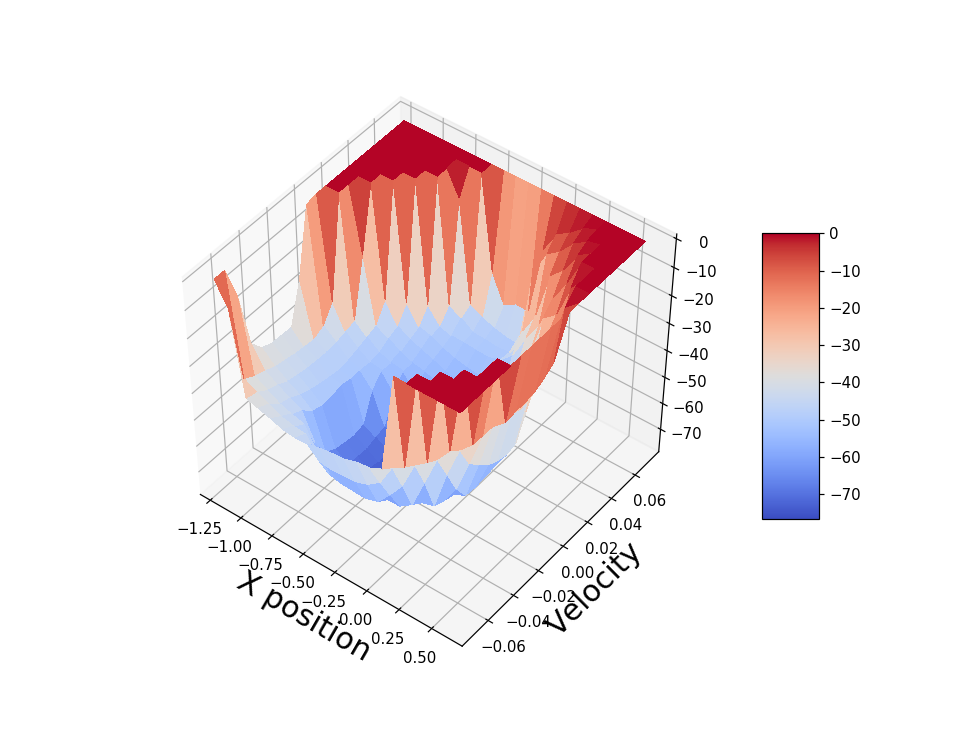

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib notebook

fig = plt.figure(figsize=(9, 7))
ax = fig.gca(projection='3d')


# Make data
x = np.linspace(env.observation_space.low[0], env.observation_space.high[0], q_table.shape[0])
y = np.linspace(env.observation_space.low[1], env.observation_space.high[1], q_table.shape[1])
z = np.min(q_table, axis=-1)


# Make data.
X, Y = np.meshgrid(x, y)

# Plot the surface.
surf = ax.plot_surface(X, Y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('X position', fontsize=20)
ax.set_ylabel('Velocity', fontsize=20)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
